In [1]:
import pandas as pd
df = pd.read_csv(
     r"C:\Users\Sina\Desktop\CODES\Sources\5(CLASSIFICATION)\1(NAIVEBAYES)\1(user_courses_review_09_2023).csv",
    on_bad_lines='skip',
    quotechar='"'
)
df.columns = ['course_name', 'lecture_name', 'review_rating', 'review_comment']


In [2]:
## Step 2: Clean missing data & label creation

df.dropna(subset=['review_rating', 'review_comment'], how='all', inplace=True)
df['review_comment'] = df['review_comment'].fillna('')
df['review_rating'] = pd.to_numeric(df['review_rating'], errors='coerce')
df['label'] = df['review_rating'].apply(lambda x: 1 if x >= 4 else 0)
df = df.dropna(subset=['review_rating'])


In [3]:
## Step 3: Clean the review text
import re, string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return ' '.join(words)

df = df.copy()
df.loc[:, 'cleaned_comment'] = df['review_comment'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
## Step 4: Vectorize using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_comment'])
y = df['label']


In [5]:
## Step 5: Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Step 5.5: Apply SMOTE on training data ONLY
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [7]:
# Step 6: Train Multinomial Naive Bayes on resampled data
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_res, y_train_res)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.17      0.73      0.28        83
           1       0.99      0.86      0.92      2082

    accuracy                           0.86      2165
   macro avg       0.58      0.80      0.60      2165
weighted avg       0.96      0.86      0.90      2165



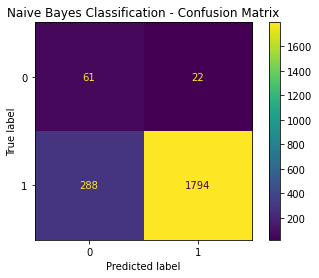

Accuracy: 0.8568129330254042


In [12]:
## Step 7: Predict and Evaluate
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Naive Bayes Classification - Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [9]:
# Get feature names and their importance weights
feature_names = vectorizer.get_feature_names_out()
# ✅ Get the list of all words (features) used by the TfidfVectorizer

log_probs = model.feature_log_prob_
# ✅ Get the log probabilities of each word for each class (from the trained Naive Bayes model)
# 🔸 log_probs[1]: log probabilities for class 1 (positive reviews)
# 🔸 log_probs[0]: log probabilities for class 0 (negative reviews)

In [10]:
# Sort all words by their importance (log probability) in each class
top_pos = sorted(zip(log_probs[1], feature_names), reverse=True)
top_neg = sorted(zip(log_probs[0], feature_names), reverse=True)


In [11]:
# Print all words ranked by importance
print("All positive words (most to least important):")
print([word for _, word in top_pos])

print("\nAll negative words (most to least important):")
print([word for _, word in top_neg])


All positive words (most to least important):
['excellent', 'good', 'great', 'course', 'amazing', 'nice', 'awesome', 'informative', 'easy', 'really', 'well', 'thanks', 'explanation', 'interesting', 'far', 'understand', 'thank', 'useful', 'content', 'clear', 'perfect', 'data', 'explained', 'learning', 'helpful', 'best', 'expectation', 'love', 'lot', 'insightful', 'exceeded', 'simple', 'like', 'learn', 'beginner', 'way', 'much', 'science', 'fantastic', 'information', 'basic', 'concept', 'example', 'introduction', 'experience', 'one', 'wonderful', 'detailed', 'knowledge', 'teaching', 'follow', 'video', 'practical', 'lecture', 'lesson', 'work', 'enjoying', 'instructor', 'im', 'understanding', 'super', 'python', 'educative', 'concise', 'superb', 'time', 'point', 'cool', 'enjoyed', 'need', 'topic', 'presentation', 'help', 'job', 'new', 'material', 'star', 'understandable', 'excel', 'loved', 'make', 'learned', 'quite', 'everything', 'get', 'short', 'thing', 'would', 'class', 'chatgpt', 'excit